# Zeroth-Order Frank Wolfe for Black-Box Adversarial Attacks



In [ ]:
!pip install tensorflow keras

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import shutil

In [ ]:
# if using google drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# if using git clone and runtime space

!git clone https://github.com/marcouderzo/FW-AdversarialAttacks

os.chdir('FW-AdversarialAttacks')

Cloning into 'FW-AdversarialAttacks'...
remote: Enumerating objects: 649, done.
remote: Counting objects: 100% (606/606), done.
remote: Compressing objects: 100% (407/407), done.
remote: Total 649 (delta 270), reused 516 (delta 192), pack-reused 43
Receiving objects: 100% (649/649), 19.22 MiB | 38.06 MiB/s, done.
Resolving deltas: 100% (272/272), done.


In [ ]:
os.path.abspath('Universal_Attack.py')

'/content/FW-AdversarialAttacks/Universal_Attack.py'

## FZCGS

In [2]:
#FZCGS

!python3 Universal_Attack.py -optimizer FZCGS -nStage 200


#source_file_path = '/content/FW-AdversarialAttacks/Results/FZCGS/log.txt'
#destination_folder = '/content/drive/MyDrive/FW-AdversarialAttacks/FZCGS/'
#shutil.copy(source_file_path, destination_folder)

^C


FileNotFoundError: [Errno 2] No such file or directory: '/content/FW-AdversarialAttacks/Results/FZCGS/log.txt'

In [ ]:
path = 'Results/FZCGS/'

iteration_index_FZCGS = []
query_count_FZCGS = []
losses_FZCGS = []
times_FZCGS = []


file_path = path + 'log.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines:
    if 'Iteration Index:' in line:
        words = line.split()
        iteration_index_FZCGS.append(int(words[2]))
        losses_FZCGS.append(float(words[6]))
        query_count_FZCGS.append(int(words[4]))
        times_FZCGS.append(float(words[14])/3600) # in hours


iteration_index_FZCGS = np.array(iteration_index_FZCGS)
losses_FZCGS = np.array(losses_FZCGS)
query_count_FZCGS = np.array(query_count_FZCGS)
times_FZCGS = np.array(times_FZCGS)

#print("Iteration Index:", iteration_index_FZCGS)
#print("Losses:", losses_FZCGS)
#print("Query Count:", query_count_FZCGS)
#print("Times:", times_FZCGS)

# Plotting losses vs. iteration index
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_FZCGS, losses_FZCGS, color='b')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')


# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_FZCGS, losses_FZCGS, color='orange')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')

# Plotting loss vs. time
plt.figure(figsize=(8, 6))
plt.plot(times_FZCGS, losses_FZCGS, color='green')
plt.title('Loss vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Loss')
plt.ticklabel_format(style='plain')


plt.ticklabel_format(style='plain')
#plt.tight_layout()
plt.show()


IndexError: list index out of range

## SGFFW with RDSA

In [ ]:
#SGFFW with RDSA

!python3 Universal_Attack.py -optimizer SGFFW -grad_approx_scheme RDSA -nStage 6000

Output streaming troncato alle ultime 5000 righe.
1/1 [==============================] - 0s 22ms/step
Iteration Index:  5043
Loss_Overall:  17.68949832252127  Loss_L2:  6.454783337627473  Loss_Attack:  3.744905
1/1 [==============================] - 0s 23ms/step
Iteration Index:  5044
Loss_Overall:  17.65640993162736  Loss_L2:  6.457058620897379  Loss_Attack:  3.733117
1/1 [==============================] - 0s 24ms/step
Iteration Index:  5045
Loss_Overall:  17.62380079064717  Loss_L2:  6.459375417569777  Loss_Attack:  3.7214751
1/1 [==============================] - 0s 30ms/step
Iteration Index:  5046
Loss_Overall:  17.592749509580056  Loss_L2:  6.46109572387449  Loss_Attack:  3.7105513
1/1 [==============================] - 0s 23ms/step
Iteration Index:  5047
Loss_Overall:  17.57972620232239  Loss_L2:  6.46144054634705  Loss_Attack:  3.7060952
1/1 [==============================] - 0s 23ms/step
Iteration Index:  5048
Loss_Overall:  17.565325154854104  Loss_L2:  6.46186102826719  Loss_

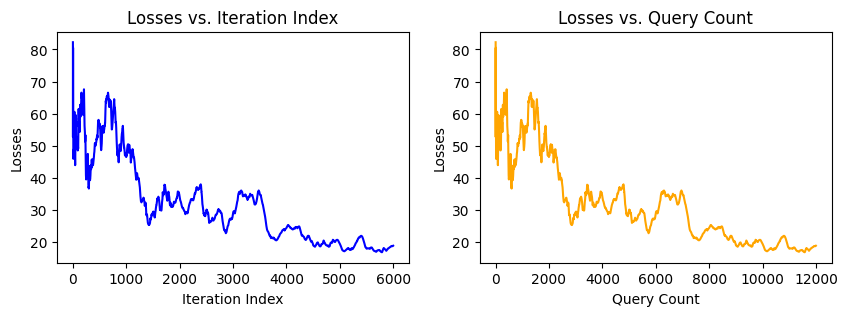

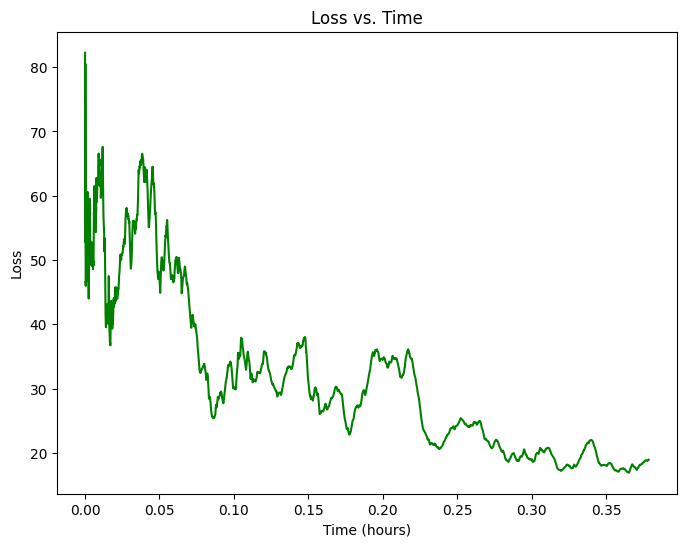

In [ ]:
path = 'Results/SGFFW/RDSA/'

iteration_index= []
query_count = []
losses = []
times = []


file_path = path + 'log.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines:
    if 'Iteration Index:' in line:
        words = line.split()
        iteration_index.append(int(words[2]))
        losses.append(float(words[6]))
        query_count.append(int(words[4]))
        times.append(float(words[14])/3600) # in hours
        #print(float(words[14]))


iteration_index_RDSA = np.array(iteration_index)
losses_RDSA = np.array(losses)
query_count_RDSA = np.array(query_count)
times_RDSA = np.array(times)


#print("Iteration Index:", iteration_index_RDSA)
#print("Losses:", losses_RDSA)
#print("Query Count:", query_count_RDSA)
#print("Times:", times_RDSA)


# Plotting losses vs. iteration index
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_RDSA, losses_RDSA, color='b')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')

# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_RDSA, losses_RDSA, color='orange')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')


# Plotting loss vs. time
plt.figure(figsize=(8, 6))
plt.plot(times_RDSA, losses_RDSA, color='green')
plt.title('Loss vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Loss')
plt.ticklabel_format(style='plain')



plt.ticklabel_format(style='plain')

#plt.tight_layout()
plt.show()


## SGFFW with I-RDSA

In [ ]:
#SGFFW with I-RDSA

!python3 Universal_Attack.py -optimizer SGFFW -grad_approx_scheme I-RDSA -nStage 1000

Output streaming troncato alle ultime 5000 righe.
1/1 [==============================] - 0s 34ms/step
Iteration Index:  2478
Loss_Overall:  5.849815185493677  Loss_L2:  5.849815185493677  Loss_Attack:  0.0
1/1 [==============================] - 0s 24ms/step
Iteration Index:  2479
Loss_Overall:  5.846269265334371  Loss_L2:  5.846269265334371  Loss_Attack:  0.0
1/1 [==============================] - 0s 35ms/step
Iteration Index:  2480
Loss_Overall:  5.8427816894345215  Loss_L2:  5.8427816894345215  Loss_Attack:  0.0
1/1 [==============================] - 0s 28ms/step
Iteration Index:  2481
Loss_Overall:  5.837889380540015  Loss_L2:  5.837889380540015  Loss_Attack:  0.0
1/1 [==============================] - 0s 30ms/step
Iteration Index:  2482
Loss_Overall:  5.833059190564964  Loss_L2:  5.833059190564964  Loss_Attack:  0.0
1/1 [==============================] - 0s 29ms/step
Iteration Index:  2483
Loss_Overall:  5.828353011980381  Loss_L2:  5.828353011980381  Loss_Attack:  0.0
1/1 [=======

In [ ]:
path = 'Results/SGFFW/I-RDSA/'

iteration_index= []
query_count = []
losses = []
times = []


file_path = path + 'log.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines:
    if 'Iteration Index:' in line:
        words = line.split()
        iteration_index.append(int(words[2]))
        losses.append(float(words[6]))
        query_count.append(int(words[4]))
        times.append(float(words[14])/3600) # in hours


iteration_index_IRDSA = np.array(iteration_index)
losses_IRDSA = np.array(losses)
query_count_IRDSA = np.array(query_count)
times_IRDSA = np.array(times)

#print("Iteration Index:", iteration_index_IRDSA)
#print("Losses:", losses_IRDSA)
#print("Query Count:", query_count_IRDSA)
#print("Times:", times_RDSA)

# Plotting losses vs. iteration index
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_IRDSA, losses_IRDSA, color='b')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')

# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_IRDSA, losses_IRDSA, color='orange')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')
plt.ticklabel_format(style='plain')

# Plotting loss vs. time
plt.figure(figsize=(8, 6))
plt.plot(times_IRDSA, losses_IRDSA, color='green')
plt.title('Loss vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Loss')
plt.ticklabel_format(style='plain')


#plt.tight_layout()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'Results/SGFFW/I-RDSA/log.txt'

## SGFFW with KWSA

In [ ]:
#SGFFW with KWSA

!python3 Universal_Attack.py -optimizer SGFFW -grad_approx_scheme KWSA -nStage 1000


source_file_path = '/content/FW-AdversarialAttacks/Results/KWSA/log.txt'
destination_folder = '/content/drive/MyDrive/FW-AdversarialAttacks/KWSA/'
shutil.copy(source_file_path, destination_folder)

Output streaming troncato alle ultime 5000 righe.
1/1 [==============================] - 0s 16ms/step
Iteration Index:  235
Loss_Overall:  36.59380680562663  Loss_L2:  5.195607724205726  Loss_Attack:  10.466066
1/1 [==============================] - 0s 22ms/step
Iteration Index:  236
Loss_Overall:  34.183880968139796  Loss_L2:  5.206673784301908  Loss_Attack:  9.659069
1/1 [==============================] - 0s 33ms/step
Iteration Index:  237
Loss_Overall:  31.71922484778487  Loss_L2:  5.203721918097368  Loss_Attack:  8.838501
1/1 [==============================] - 0s 19ms/step


In [ ]:
path = 'Results/SGFFW/KWSA/'

iteration_index= []
query_count = []
losses = []
times = []


file_path = path + 'log.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines:
        if 'Iteration Index:' in line:
            words = line.split()
            iteration_index.append(int(words[2]))
            losses.append(float(words[6]))
            query_count.append(int(words[4]))
            times.append(float(words[14])/3600) # in hours



iteration_index_KWSA = np.array(iteration_index)
losses_KWSA= np.array(losses)
query_count_KWSA = np.array(query_count)
times_KWSA = np.array(times)

#print("Iteration Index:", iteration_index_KWSA)
#print("Losses:", losses_KWSA)
#print("Query Count:", query_count_KWSA)
#print("Times:", times_KWSA)


# Plotting losses vs. iteration index
plt.figure(figsize=(17, 3))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_KWSA, losses_KWSA, color='b')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')

# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_KWSA, losses_KWSA, color='orange')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')

# Plotting loss vs. time
plt.figure(figsize=(8, 6))
plt.plot(times_KWSA, losses_KWSA, color='green')
plt.title('Loss vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Loss')
plt.ticklabel_format(style='plain')

plt.ticklabel_format(style='plain')
plt.show()



## All Algorithms Compared

In [ ]:
# Plotting losses vs. iteration index
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(iteration_index_FZCGS, losses_FZCGS,color='orange', label='FZCGS')
plt.plot(iteration_index_RDSA, losses_RDSA, color='cyan', label='RDSA')
plt.plot(iteration_index_IRDSA, losses_IRDSA, color='green', label='IRDSA')
plt.plot(iteration_index_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Losses vs. Iteration Index')
plt.xlabel('Iteration Index')
plt.ylabel('Losses')
plt.legend()

# Plotting losses vs. query count
plt.subplot(1, 2, 2)
plt.plot(query_count_FZCGS, losses_FZCGS, color='orange', label='FZCGS')
plt.plot(query_count_RDSA, losses_RDSA, color='cyan', label='RDSA')
plt.plot(query_count_IRDSA, losses_IRDSA, color='green', label='IRDSA')
plt.plot(query_count_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Losses vs. Query Count')
plt.xlabel('Query Count')
plt.ylabel('Losses')
plt.legend()

# Plotting loss vs. time
plt.figure(figsize=(8, 6))
plt.plot(times_FZCGS, losses_FZCGS, color='orange', label='FZCGS')
plt.plot(times_RDSA, losses_RDSA, color='cyan', label='RDSA')
plt.plot(times_IRDSA, losses_IRDSA, color='green', label='IRDSA')
plt.plot(times_KWSA, losses_KWSA, color='purple', label='KWSA')
plt.title('Loss vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Loss')
plt.ticklabel_format(style='plain')

plt.ticklabel_format(style='plain')
plt.show()